## Goal: The content  implements the algorithm  "Eigenfaces for Face Detection/Recognition", a journal paper by Turk and Petland 
### Many of the mathematics required for this journal as well as machine learning  are described with python code in the previous posts of Linear Algerba for Machine Learning 

In [1]:
import numpy as np
from numpy import array
from matplotlib import pyplot as plt
from PIL import Image

##  Let's implement the algorithm described in the paper as: 
###                                   Computation of the eigenfaces
### Step 1: obtain training face images I1, I2, ..., IM (training faces)
### Step 2 : represent every image $I_{i}$ as a face vector ${\tau}_{i}$
### Step 3:  Calculate average face
## $ \psi \; =  1/M * \sum\limits _{i=1}^{M}{\tau}_{i}$
### Step 4 :Subtract mean face from each training face
## $ {\phi}_{i}\; =  {\tau}_{i} - \psi$
### Step 5 : Calculate Covariance Matrix 
## $ C = 1/M * A.A^{T}$ where M is total sample faces in the dataset 
### sicne $A.A^{T}$ is very large we can  compute $A^{T}.A$ and its eigen vectors  but in this problem i just calculated $ A.A^{T}$ and its eigen vectors and values  using Singuar Value Decomposition

### Step 6: Compute eigennvectors and values from SVD
### U, S, V = SVD(C =  $ 1/M*A.A^{T}$) , U and V are eigen vectors and S is the eigen value 
### Step 7: Select only the K eigen vectors of U correpsonding to Highest K eigen values


### Now implement the above steps  as below:
### Step 1: obtain training face images I1, I2, ..., IM (training faces)

In [2]:
img_array = []
Vec = []
def data_process(i):
                        imag = Image.open(f'image data/{i}a.jpg') ## retreive images from current directory ++
                          ## ++ using i' current value eg (f'img dt1/{i}a.jpg')- if i =1 then 1a image retreived  
                                     
                        im = imag.convert('L')  # convert RGB image to grayscale
                                
                        width, height = 50,50  # resize the image with 50*50 dimension 
                        rszed_img = im.resize((width, height),Image.ANTIALIAS)
                             
                        img_array = np.array(rszed_img)

                          # now flatten the 50*50 image matrix array into N^2 * 1 column vector = 2500*1 column vector
                        col_vect_img = img_array.flatten()
                               # print(col_vect_img.shape)
                        Vec.append(col_vect_img)
                

### import images from a dataset and store  in the image aray
for i in range(1,10):
           
               #for j in range(1,3):   
                       
                     data_process(i)

### Step 2 : represent every image $I_{i}$ as a face vector ${\tau}_{i}$
### The sample dataset containes  9 Training Face Images into matrix form as below.

In [3]:
tau = array(Vec)  #    tau is the 2d vmatrix representing  array of faces  
print(tau)
print(tau.shape)


[[182 182 181 ...  81 123 122]
 [196 196 197 ...  28  24  23]
 [195 195 195 ...  19  22  23]
 ...
 [248 248 248 ... 121 122 123]
 [184 184 184 ...  44  41  38]
 [165 166 165 ... 120 122 124]]
(9, 2500)


In [4]:
print(tau.shape)  ## toal image = 9 and each image is 2500 pixels when transfomred into a column vector (50*50 = 2500)

(9, 2500)


#### Lets see the  pixel values of 1st image in the trainign set

In [5]:
print(tau[0,:]) 
print(tau[0,:].shape)   ### the 1st image is represented as a column vector and in numpy such representation assumes 
                          ### each sub array array (within a face matrix like tau) represents  pixels values for single image 

[182 182 181 ...  81 123 122]
(2500,)


### Step 3 . Calcuate the mean/ average face
# $ \psi \; =  1/M * \sum\limits _{i=1}^{M}{\tau}_{i}$


In [9]:
from numpy import array
from numpy import mean
mean_face = mean(tau, axis =0)  # take mean values of the overall matrix column wise where each column ++ 
                    ##++ represents the  particular pixel value of all pictures at that coordinate positon becuase in numpy 
                        ## each image represented as a column vector is represented as  one array element.
print(type(mean_face))
print("Mean Face of all pictures column wise",mean_face)

Psi = mean_face ### it's not necessary to assign mean_face as Psi but for readability it is done so
                  
print("Mean Face Psi of all pictures = ", Psi)
print(Psi.shape)

<class 'numpy.ndarray'>
Mean Face of all pictures column wise [199.77777778 200.         199.77777778 ...  50.55555556  57.66666667
  58.22222222]
Mean Face Psi of all pictures =  [199.77777778 200.         199.77777778 ...  50.55555556  57.66666667
  58.22222222]
(2500,)


### Lest Plot the mean face and see how the mean image looks like 

Text(0.5, 1.0, 'Mean Face')

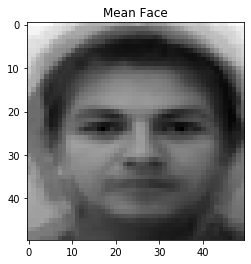

In [10]:
from matplotlib import pyplot as plt
plt.imshow(Psi.reshape(50,50),cmap='gray'); 
plt.title('Mean Face')

## Step 4:  Subtract mean face from each training face
# $ {\phi}_{i}\; =  {\tau}_{i} - \psi$


In [11]:
# get PHI = subtract mean from each col vector or from each image
Phi = tau - Psi
print(Phi)   # # here each image is represented row wise not column wise 
print(Phi.shape)  

[[-17.77777778 -18.         -18.77777778 ...  30.44444444  65.33333333
   63.77777778]
 [ -3.77777778  -4.          -2.77777778 ... -22.55555556 -33.66666667
  -35.22222222]
 [ -4.77777778  -5.          -4.77777778 ... -31.55555556 -35.66666667
  -35.22222222]
 ...
 [ 48.22222222  48.          48.22222222 ...  70.44444444  64.33333333
   64.77777778]
 [-15.77777778 -16.         -15.77777778 ...  -6.55555556 -16.66666667
  -20.22222222]
 [-34.77777778 -34.         -34.77777778 ...  69.44444444  64.33333333
   65.77777778]]
(9, 2500)


### Step 5 : Calculate Covariance Matrix 
## $ C = 1/M * A.A^{T}$ where M is total sample faces in the dataset 
## where A is $\phi $ here

In [12]:
cov_mtrx = 1/9* Phi.T.dot(Phi)
print(cov_mtrx)

[[ 524.83950617  522.          527.72839506 ...  -53.43209877
  -137.85185185 -124.17283951]
 [ 522.          519.33333333  525.         ...  -49.66666667
  -135.22222222 -120.77777778]
 [ 527.72839506  525.          531.0617284  ...  -60.09876543
  -151.74074074 -137.28395062]
 ...
 [ -53.43209877  -49.66666667  -60.09876543 ... 1823.80246914
  1916.2962963  1911.7654321 ]
 [-137.85185185 -135.22222222 -151.74074074 ... 1916.2962963
  2208.         2196.18518519]
 [-124.17283951 -120.77777778 -137.28395062 ... 1911.7654321
  2196.18518519 2190.17283951]]


### Note --> Rank of Original image matrix vs Covariance matrix -->Here in the above covaraince the  dimensions of the original dataset is reduced by finding the correlation, but  still with such reduced form one can  approximately retain the original image maximum information.

#### As it can be seen that the rank of covariance matrix is smaller compared to the original dataset matrix's rank

In [58]:
print("the rank of original matrix is  = ", np.linalg.matrix_rank(tau))

the rank of original matrix is  =  9


In [59]:
#from numpy.linalg import matrix_rank
print("the rank of covariance matrix is  = ", np.linalg.matrix_rank(cov_mtrx))

the rank of covariance matrix is  =  8


### Step 6: Compute eigennvectors and values from SVD
###  U, S, V = SVD($ 1/M*A.A^{T}$) , U and V are eigen vectors and S is the eigen value 

### U is the numerical value that determines one face vs the other 

In [63]:
U, S, V_T = np.linalg.svd(cov_mtrx)

print(U)  

print(S)
print(V_T)  ## in numpy the calcuates V value is the  V transpose so denote it by V_T

[[-0.00647466 -0.00626376  0.00180496 ...  0.06615908 -0.01469635
   0.0145002 ]
 [-0.00657194 -0.00633763  0.0014738  ...  0.10651955 -0.0104971
  -0.01666613]
 [-0.00675878 -0.0062386   0.00157599 ...  0.05411825 -0.02884979
  -0.01033678]
 ...
 [ 0.02218892 -0.0202691  -0.02993958 ... -0.02000696  0.03067539
  -0.0103409 ]
 [ 0.02579408 -0.02095652 -0.02560288 ...  0.01165284  0.00892754
   0.00242553]
 [ 0.02461724 -0.0218208  -0.02664836 ...  0.05489024 -0.01176765
   0.05909717]]
[1.50954540e+06 1.29312288e+06 5.27784521e+05 ... 4.97929036e-11
 4.72888588e-11 1.84431824e-11]
[[-0.00647466 -0.00657194 -0.00675878 ...  0.02218892  0.02579408
   0.02461724]
 [-0.00626376 -0.00633763 -0.0062386  ... -0.0202691  -0.02095652
  -0.0218208 ]
 [ 0.00180496  0.0014738   0.00157599 ... -0.02993958 -0.02560288
  -0.02664836]
 ...
 [ 0.         -0.01841965 -0.02361186 ... -0.00080894 -0.01633223
   0.00424081]
 [ 0.          0.01934397  0.00132478 ...  0.01281081 -0.01861862
   0.01999523]
 [

In [64]:
print("eigen faces/eigen vectors U from SVD = ",U)
print("eigen faces/eigen vectors U from SVD = ", U.shape)
print("EGN VAL",S)
print("Eigen values from SVD = ", S.shape)

eigen faces/eigen vectors U from SVD =  [[-0.00647466 -0.00626376  0.00180496 ...  0.06615908 -0.01469635
   0.0145002 ]
 [-0.00657194 -0.00633763  0.0014738  ...  0.10651955 -0.0104971
  -0.01666613]
 [-0.00675878 -0.0062386   0.00157599 ...  0.05411825 -0.02884979
  -0.01033678]
 ...
 [ 0.02218892 -0.0202691  -0.02993958 ... -0.02000696  0.03067539
  -0.0103409 ]
 [ 0.02579408 -0.02095652 -0.02560288 ...  0.01165284  0.00892754
   0.00242553]
 [ 0.02461724 -0.0218208  -0.02664836 ...  0.05489024 -0.01176765
   0.05909717]]
eigen faces/eigen vectors U from SVD =  (2500, 2500)
EGN VAL [1.50954540e+06 1.29312288e+06 5.27784521e+05 ... 4.97929036e-11
 4.72888588e-11 1.84431824e-11]
Eigen values from SVD =  (2500,)


### Note that each eigen values's corresposding eigen vector is a column elemnt of U
### i.e the first eigen vector u1 corresposing to eigen value S1 is as below

In [18]:
print("The First/Highest  eigen value = ",S[0] ,"and", U[:,0], " is the corresposing eigen vector  " )

The First/Highest  eigen value =  1509545.3950034895 and [-0.00647466 -0.00657194 -0.00675878 ...  0.02218892  0.02579408
  0.02461724]  is the corresposing eigen vector  


#### 1st Image Reconstruction from obtained eigen faces as a linear combination

## ${\tau}_{i} = \psi + \sum\limits _{i=1}^{M} u_{i}w_{i}  $


### Lets first  calcualte $w_{i}$  for ith image
## ${w}_{i} = u_{i}^T{\phi}_{i}$ where ${w}_{i}$ is the weight of ith image learned from the training set
### $\Omega\; / \;w_{i} = [w_{1},w_{2},......, w_{n}] $

In [21]:
wt_1a = U.T.dot(Phi[0,:])  ## calcuate w_1a for  1st training image 1a
print(wt_1a)  
   # as wt_1a is  1a training face,  now test and compare this value with wt_1b of same untrained face 
## and check whether test image wt_1b is same face as like wt_1a --> if  1a ==== 1b then its same face but with certain threshold 

[ 1.01491559e+03 -8.89473849e+02  6.21642268e+02 ...  6.35047570e-14
 -1.72306613e-13 -3.90798505e-14]


## ${\tau}_{i} = \psi + \sum\limits _{i=1}^{M} u_{i}w_{i}  $
## ${\tau}{1} = \psi + \sum\limits _{i=1}^{M} u_{1}w_{1}  $

In [36]:
u1a = U.dot(wt_1a)
print(u1a)

[-17.77777778 -18.         -18.77777778 ...  30.44444444  65.33333333
  63.77777778]


In [41]:
img_1a =  Psi +  u1a
print(img_1a)  # reconstrcted 1st image as a linear combinaiton  matches the original  1st image values as below

[182. 182. 181. ...  81. 123. 122.]


In [40]:
print(tau[0])  # original  1st image pixel values

[182 182 181 ...  81 123 122]


## Perform Image reconstuction of Test set image (1b in this case) using same values of eigen faces/eigen vectors  and mean face obtained from the taining set


## ${\tau}_{test} = \psi + \sum\limits _{i=1}^{M} u_{i}w_{i}  $

## ${w}_{i} = u_{i}^T{\phi}_{test}$
### calculate $w_{i}$

In [30]:
test_img_array1b = []
test_Vec1b = []



def data_process():
                        test_imag1b = Image.open(f'image data/{1}b.jpg') ## retreive images from current directory ++
                          ## ++ using i' current value eg (f'img dt1/{i}a.jpg')- if i =1 then 1a image retreived  
                              # print(imag.format)             
                          # print(imag.mode)
                          # print(imag.size)
                          #imag.show()   # display image on desktop by the os        
                        test_im1b = test_imag1b.convert('L')
                                 # print(im.mode)
                        width, height = 50,50
                        test_rszed_img1b =  test_im1b.resize((width, height),Image.ANTIALIAS)
                             # print(rszed_img.size)
                             #rszed_img.show()
                             # print(rszed_img.format)
                           ## now convert the resized image into numpy array
                        test_img_array1b = np.array(test_rszed_img1b)

                          # now flatten the 70*70 matrix array into N^2 * 1 column vector = 4900*1 column vector
                        test_col_vect_img1b = test_img_array1b.flatten()
                               # print(col_vect_img.shape)
                        test_Vec1b.append(test_col_vect_img1b)
data_process() 

In [32]:
tau_tst1b = array(test_Vec1b)  # convert list into 200*2500  matrix
print(tau_tst1b)


[[186 186 186 ... 108 127 126]]


### Using calcuated  mean  and eigen vectors from training set images we approximate and represent the test image(1b in this case") not in training set hecne we calcuate Phi_test for new test image
##   $ {\phi}_{Test}\; =  {\tau}_{test} - \psi$

In [34]:
# get PHI = subtract mean from each col vector or from each image
Phi_Test1b = tau_tst1b - Psi  ## note Psi  is the mean face from traninign set and its not calcuated in the new test image
print(Phi_Test1b)   
print(Phi_Test1b.shape)

[[-13.77777778 -14.         -13.77777778 ...  57.44444444  69.33333333
   67.77777778]]
(1, 2500)


#### Test Image Reconstruction from obtained eigen faces as a linear combination

## ${\tau}_{test} = \psi + \sum\limits _{i=1}^{M} u_{i}w_{test}  $

## ${w}_{test} = u_{i}^T{\phi}_{test}$
### calcualtion $w_{1b}  \; first $

In [35]:
wt_1b = U.T.dot(Phi_Test1b[0,:])  # note here U is the learned eigen vector obtained from training image dataset 
## and using this value,  test image can be reconstrcuted 
print(wt_1b) ### as ohm sign w_i =  wt_test test image weight 


[1055.85153152 -818.45906806  640.03243047 ...    7.79627915  -24.8320599
  -10.19741519]


In [38]:
u1b = U.dot(wt_1b)
print(u1b)

[-13.77777778 -14.         -13.77777778 ...  57.44444444  69.33333333
  67.77777778]


In [42]:
img_1b = Psi + u1b
print(img_1b)   ## approximated image value 1b based on obtained training data's  mean face  

[186. 186. 186. ... 108. 127. 126.]


In [43]:
print(tau_tst1b)

[[186 186 186 ... 108 127 126]]


###  NOW MAKE A  COMPUTER RECOGNIZE  WHETHER TWO SAMPLES OF IMAGE ARE SAME OR NOT , USING  EIGEN VECTORS, MEAN FACE  CALCULATED FROM TRAINING DATA

### here we check whether  images 1a and 1b are same or not (Really they are two different samples of same image)
### Also verify whether the image 1b is same as 2a, 3a, 4a,...9a (really they are images of dfferetn person)

### Lets have an algorithm for it as below:

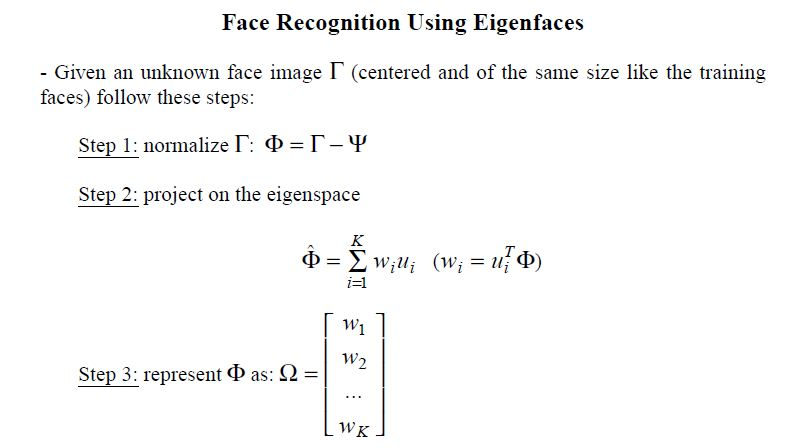
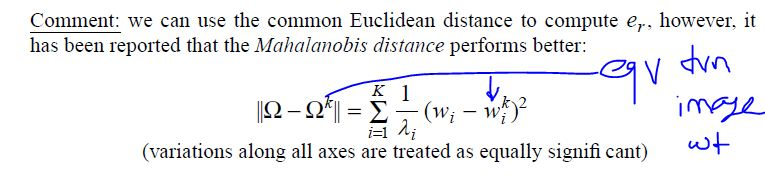
## But for simplicity we choose euclidean distance in our case
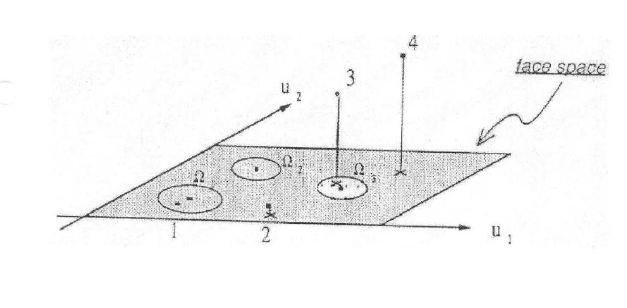
### In  the above eigen space there are trained images spanned over the 2d plane and  when a new untested image(1b in our case) is projected into the learned eigen vectors or eigen spaces of the plane then the untested image will remain closer to a point which has similar values of the trained image and hence applying a certain threshold the untested image can be compared as same/different  image with respect to the trained image set 
##### Image Src: M. Turk and A. Pentland, "Eigenfaces for Recognition

####  lets  compare Image 1b with image1a, 2a and 3a for simplicity 
## To do this Compute each image's wt vector $W_{i}$ then compare the test image wt vector to other image wt vectors using euclidean distance and see whether $w_{1b} $ closer / (similar  to)  $w_{1a}\; or\; w_{2a}\; or \;w_{3a}\; $

In [44]:
## we already calcuated wt_1a and wt_2a above so lets just print it
print("Trained image 1a learned wt = ", wt_1a)
print("Trained image 1b learned wt = ", wt_1b)


Trained image 1a learned wt =  [ 1.01491559e+03 -8.89473849e+02  6.21642268e+02 ...  6.35047570e-14
 -1.72306613e-13 -3.90798505e-14]
Trained image 1b learned wt =  [1055.85153152 -818.45906806  640.03243047 ...    7.79627915  -24.8320599
  -10.19741519]


In [45]:
wt_2a = U.T.dot(Phi[1,:])  # wt of trained 2a image 
print(wt_2a)  

[-3.47399897e+02  1.50236839e+03 -5.35017344e+02 ... -1.21680443e-13
  1.34392497e-13  9.76996262e-14]


In [46]:
wt_3a = U.T.dot(Phi[2,:])  # wt of trained 2a image 
print(wt_3a) 

[ 5.34793478e+02 -3.55669590e+02  1.03582135e+03 ...  7.83817455e-14
  2.23931984e-13 -8.92619312e-14]


### For simplicty lets just take two weights w1 and w2 of each image 1a,2a,3a and compare them with test image 1b

In [48]:
print("First two weights of test image 1b =  ", wt_1b[:2])   # take 1st two weigths of untrained image 1b 
print("First two weights of train image 1a =  ", wt_1a[:2])   # take 1st two weigths of trained image 1a 
print("First two weights of train image 2a =  ", wt_2a[:2])   # take 1st two weigths of trained image 2a
print("First two weights of train image 3a =  ", wt_3a[:2])   # take 1st two weigths of trained image 3a


First two weights of test image 1b =   [1055.85153152 -818.45906806]
First two weights of train image 1a =   [1014.91559381 -889.47384904]
First two weights of train image 2a =   [-347.39989747 1502.36839211]
First two weights of train image 3a =   [ 534.79347755 -355.66958993]


### Even from above values we can say test image 1b adn 1a have very simialr values as compared to train images 2a and 3a 
### lest compare the euclidean distance between each train image and test image 1b then  see where image 1b is nearer to hence based on closeness  and threshold values we place the test image 1b into that trained image category 

In [49]:
import math
 
d1a_1b = math.sqrt(((wt_1b[0] - wt_1a[0]) ** 2) + ((wt_1b[1] - wt_1a[1]) ** 2))
print("The distance between 1b untrained image and 1a  trained is", d1a_1b )

The distance between 1b untrained image and 1a  trained is 81.96859224202315


In [50]:
d1b_2a = math.sqrt(((wt_1b[0] - wt_2a[0]) ** 2) + ((wt_1b[1] - wt_2a[1]) ** 2))

print("The distance between 1b untrained image and 2a trained image is",d1b_2a )

The distance between 1b untrained image and 2a trained image is 2712.0757129616695


In [51]:
d1b_3a = math.sqrt(((wt_1b[0] - wt_3a[0]) ** 2) + ((wt_1b[1] - wt_3a[1]) ** 2))

print("The distance between 1b untrained image and 2a trained image is",d1b_3a )

The distance between 1b untrained image and 2a trained image is 696.904295208033


### From the above calculated distance,  image 1a and 1b can be considered same  image as its ditance is nearer among 1a,2a,3a trained images 
#### Note --> but we also need to consider the threshold distance that makes the two different images same which is not discussed in this part.  

#### Just based on closeness of the images we can't say the test image is same as the trained one there must be certain threshold so that the algorithm can compare two images as same or different

#### In short not every image that are close to each other  be considered as same but so for simplicity  this post just shows how a computer can recognize faces . More accuarate results will be done on the chpater of deep neural networks like CNN.

### Lets Visulaiuze the same in 2d plane as below

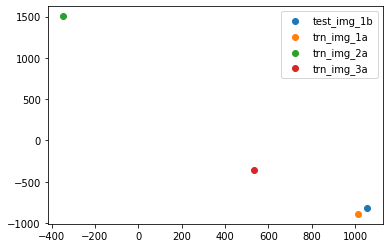

In [52]:
import matplotlib.pyplot as plt
 
plt.scatter(wt_1b[0],wt_1b[1])
plt.scatter(wt_1a[0],wt_1a[1])
plt.scatter(wt_2a[0],wt_2a[1])
plt.scatter(wt_3a[0],wt_3a[1])
plt.legend(["test_img_1b","trn_img_1a","trn_img_2a","trn_img_3a"])
plt.show() 

#### From the  above plot lib also we can see that coordinate point of image1a(orange dot) and 1b (blue dot) are close to each other than 2a(green dot) and 3a (red dot) 

### This is how an algorithm/Computer  can recognize faces using application of eigen vectors and PCA

## Refrences
1. Eigenfaces for Face Detection/Recognition(M. Turk and A. Pentland, "Eigenfaces for Recognition", Journal of Cognitive Neuroscience, vol.3, no. 1, pp. 71-86, 1991
2. Introduction To Linear Algerba, 5th Edition, Gilbert Strang
3. https://2nepalschool.naamii.org.np/  Day 2 Lecture by Binod Bhattarai,"Feature Representations : Classical vs Modern"

### Many Many thanks to NAAMII (https://www.naamii.org.np/ ) for organizing "2nd Nepal winter school in AI"with world class experts and enthusiastic learners from around the globe.
**** 
I am extremly thankful to <b> Dr. Binod Bhattarai (General Co-chair Second Nepal Winter School in AI, 2019) for presenting detailed lectures on  "Feature Representations : Classical vs Modern" and providing a wonderful lab task.</b> <u>His lectures and lab task provided me insights on the application of linear algebra and its wonders to real world.</u>  

*** 
<font color = Blue><b>At present Dr. Bhattarai is an Assistant Professor in the Natural and Computing School of the University of Aberdeen. His  research interests are machine learning, computer vision, and medical image analysis. You can acess his home page @ https://sites.google.com/view/bbinod/home </b> </font>